In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import openweathermapy.core as owm
#import os
#import csv
import seaborn as sns

In [2]:
df_ng_demand_res = pd.read_csv("../../Data/CSV_Files/Gas_Demand_Res.csv", encoding='utf-8')
df_ng_demand_res = df_ng_demand_res.drop(['Unnamed: 0'], axis=1)
df_ng_demand_res["Date"] = pd.to_datetime(df_ng_demand_res["Date"])
# df_ng_demand_res = df_ng_demand_res.set_index("Date")
df_ng_demand_res

,Date,Area,Residential
0,2019-04-01,U.S.,327124.0
1,2019-03-01,U.S.,685904.0
2,2019-02-01,U.S.,805830.0
3,2019-01-01,U.S.,949438.0
4,2018-12-01,U.S.,762819.0
5,2018-11-01,U.S.,595468.0
6,2018-10-01,U.S.,254554.0
7,2018-09-01,U.S.,112072.0
8,2018-08-01,U.S.,99325.0
9,2018-07-01,U.S.,105470.0


In [3]:
df_ng_price_res = pd.read_csv("../../Data/CSV_Files/Gas_Price_Res.csv", encoding='utf-8')
df_ng_price_res = df_ng_price_res.drop(['Unnamed: 0'], axis=1)
df_ng_price_res["Date"] = pd.to_datetime(df_ng_price_res["Date"])
# df_ng_price_res = df_ng_price_res.set_index("Date")
df_ng_price_res

,Date,Area,Price
0,2019-04-01,U.S.,10.92
1,2019-03-01,U.S.,9.48
2,2019-02-01,U.S.,9.47
3,2019-01-01,U.S.,9.43
4,2018-12-01,U.S.,9.63
5,2018-11-01,U.S.,9.43
6,2018-10-01,U.S.,12.26
7,2018-09-01,U.S.,17.31
8,2018-08-01,U.S.,18.63
9,2018-07-01,U.S.,17.92


In [4]:
df = pd.merge(df_ng_demand_res,df_ng_price_res, on = ["Date","Area"], how = "left")
df.loc[df["Price"].isna()]

,Date,Area,Residential,Price
460,1980-12-01,U.S.,646000.0,NaN
461,1980-11-01,U.S.,392000.0,NaN
462,1980-10-01,U.S.,214000.0,NaN
463,1980-09-01,U.S.,135000.0,NaN
464,1980-08-01,U.S.,129000.0,NaN
465,1980-07-01,U.S.,145000.0,NaN
466,1980-06-01,U.S.,191000.0,NaN
467,1980-05-01,U.S.,279000.0,NaN
468,1980-04-01,U.S.,451000.0,NaN
469,1980-03-01,U.S.,673000.0,NaN


In [5]:
df.loc[(df["Area"]=="Wyoming") & (df["Date"].dt.year==1995)]

,Date,Area,Residential,Price
19018,1995-12-01,Wyoming,1565.0,NaN
19019,1995-11-01,Wyoming,1125.0,NaN
19020,1995-10-01,Wyoming,611.0,NaN
19021,1995-09-01,Wyoming,361.0,NaN
19022,1995-08-01,Wyoming,271.0,6.16
19023,1995-07-01,Wyoming,347.0,5.73
19024,1995-06-01,Wyoming,681.0,5.06
19025,1995-05-01,Wyoming,1006.0,4.82
19026,1995-04-01,Wyoming,1200.0,4.78
19027,1995-03-01,Wyoming,1453.0,4.70


In [6]:
df_ng_price_res[(df_ng_price_res["Area"]=="Wyoming") & (df_ng_price_res["Date"].dt.year==1995)]

,Date,Area,Price
18901,1995-08-01,Wyoming,6.16
18902,1995-07-01,Wyoming,5.73
18903,1995-06-01,Wyoming,5.06
18904,1995-05-01,Wyoming,4.82
18905,1995-04-01,Wyoming,4.78
18906,1995-03-01,Wyoming,4.70
18907,1995-02-01,Wyoming,4.62
18908,1995-01-01,Wyoming,4.74


In [7]:
df_ng_price_res[(df_ng_price_res["Area"]=="U.S.") & (df_ng_price_res["Date"].dt.year==1980)]

,Date,Area,Price


C:\Users\Asterion\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


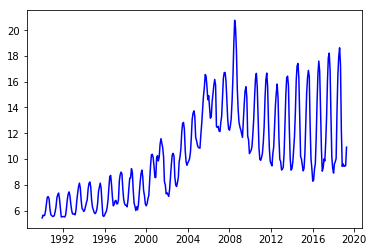

In [8]:
df_ng_price_res_US = df_ng_price_res[(df_ng_price_res["Area"]=="U.S.") & (df_ng_price_res["Date"].dt.year >= 1990)]
plt.plot(df_ng_price_res_US["Date"],df_ng_price_res_US["Price"],c="b")

C:\Users\Asterion\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


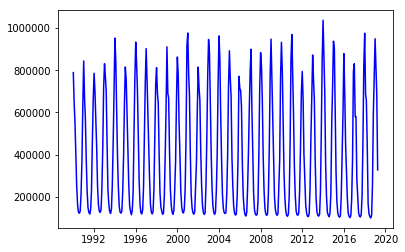

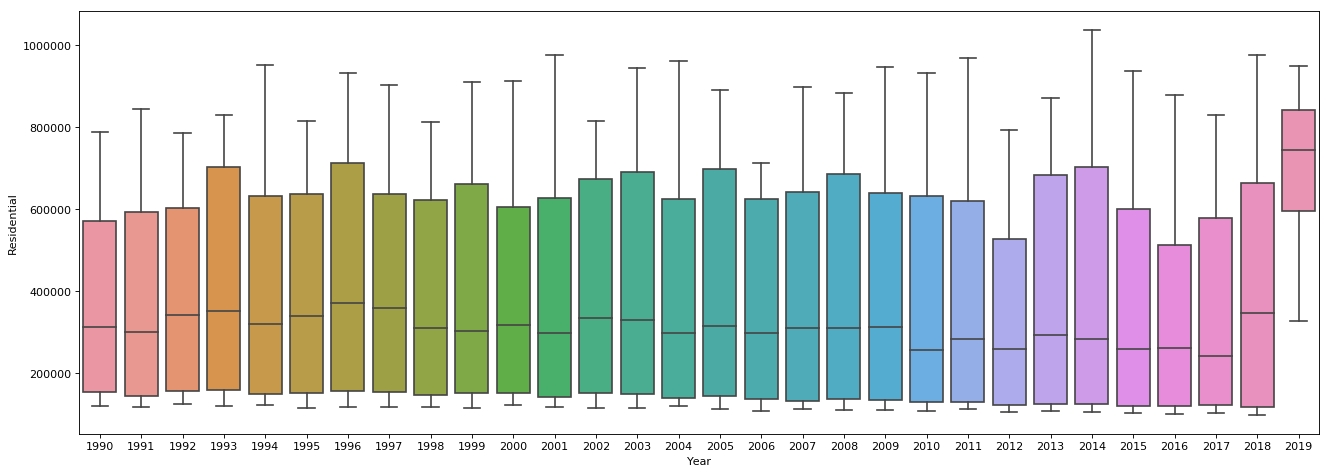

In [9]:
df_ng_demand_res_US = df_ng_demand_res[(df_ng_demand_res["Area"]=="U.S.") & (df_ng_demand_res["Date"].dt.year >= 1990)]
plt.plot(df_ng_demand_res_US["Date"],df_ng_demand_res_US["Residential"],c="b")
df_ng_demand_res_US["Year"] = df_ng_demand_res_US["Date"].dt.year
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Residential', data=df_ng_demand_res_US)

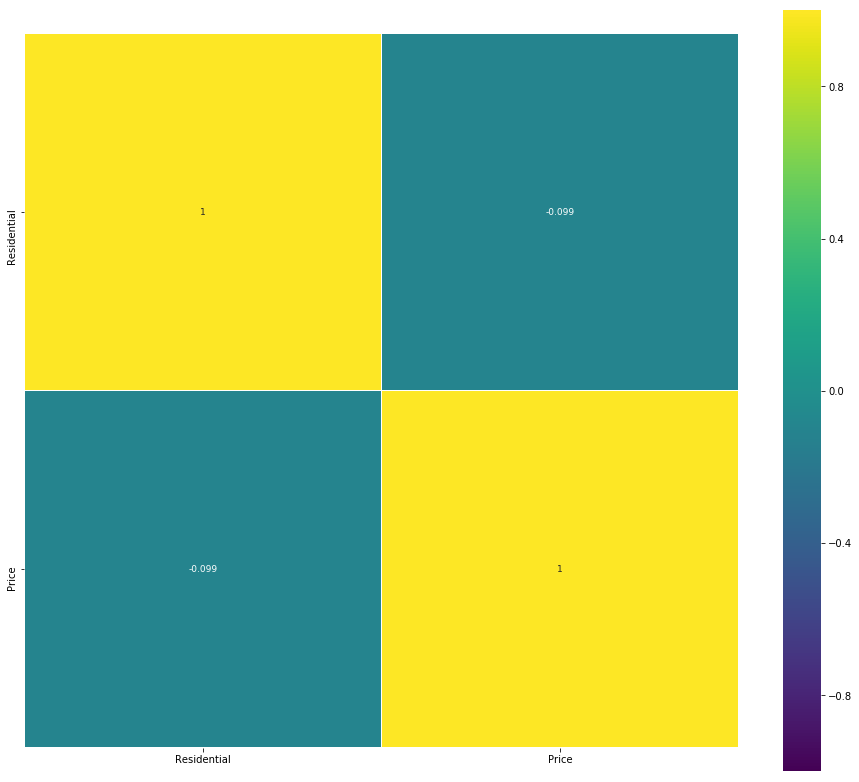

In [10]:
corr = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)],
           cmap="viridis",vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,annot_kws={"size":9},square=True)

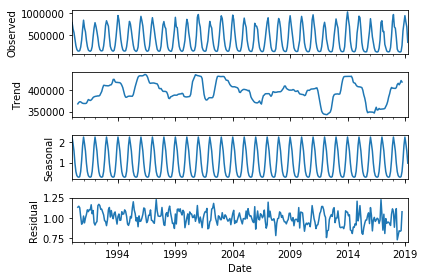

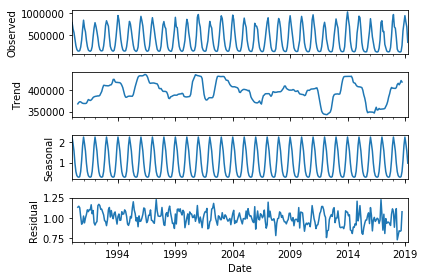

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_ng_demand_res_US = df_ng_demand_res_US.set_index("Date")

decomposition = seasonal_decompose(df_ng_demand_res_US["Residential"], model = "multiplicative")

decomposition.plot()

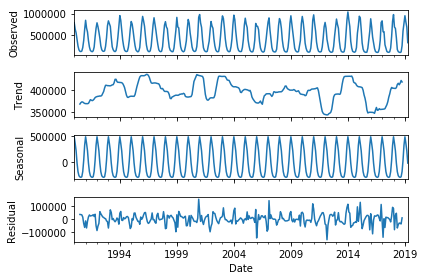

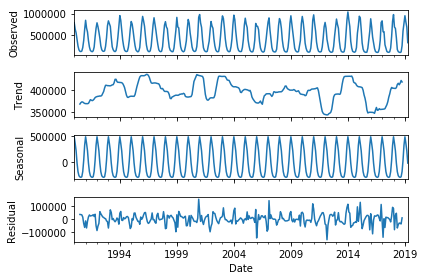

In [12]:
decomposition = seasonal_decompose(df_ng_demand_res_US["Residential"], model = "additive")

decomposition.plot()

In [32]:
trend = pd.DataFrame(decomposition.trend)
trend = trend.dropna()
seasonal = pd.DataFrame(decomposition.seasonal)
seasonal = seasonal.dropna()
residual = pd.DataFrame(decomposition.resid)
residual = residual.dropna()

In [38]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_ng_demand_res_US["Residential"], autolag='AIC')
# result = adfuller(residual["Residential"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print("The null hypothesis is that the time series is non-stationary. Since p <= 0.05, we reject the null hypotesis")
else:
    print("The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
    
# KPSS Test
result = kpss(df_ng_demand_res_US["Residential"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The null hypothesis is that the time series is stationary. Since p <= 0.05, we reject the null hypotesis")
else:
    print("The null hypothesis is that the time series is stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    


ADF Statistic: -4.138711528123944
p-value: 0.0008352614911443446
The null hypothesis is that the time series is non-stationary. Since p <= 0.05, we reject the null hypotesis
Critial Values:
   1%, -3.4499043309021955
Critial Values:
   5%, -2.870154885338925
Critial Values:
   10%, -2.5713597190254385

KPSS Statistic: 0.021292
p-value: 0.100000
The null hypothesis is that the time series is stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


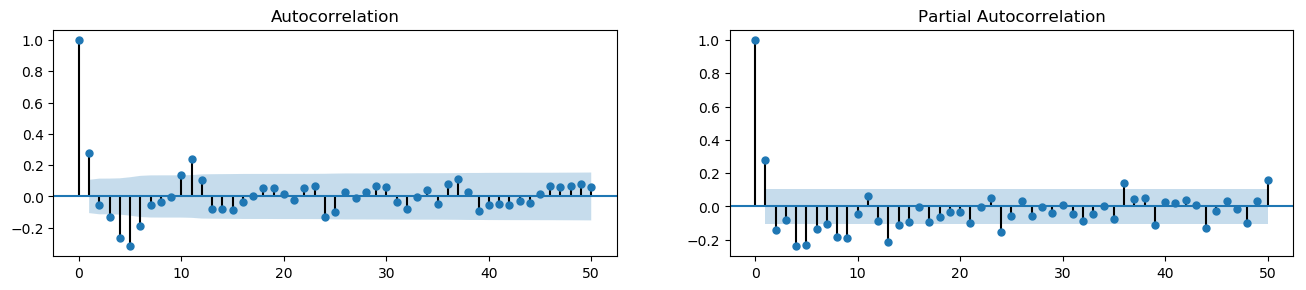

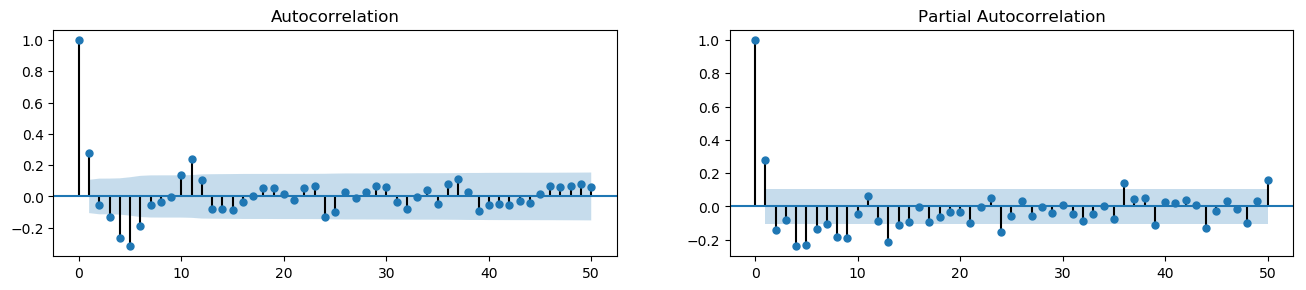

In [36]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# plot_acf(df_ng_demand_res_US["Residential"].tolist(), lags=50, ax=axes[0])
# plot_pacf(df_ng_demand_res_US["Residential"].tolist(), lags=50, ax=axes[1])
plot_acf(residual["Residential"].tolist(), lags=50, ax=axes[0])
plot_pacf(residual["Residential"].tolist(), lags=50, ax=axes[1])